In [2]:
cd newtables\

C:\Users\tanxi\newtables


In [ ]:
import pandas as pd
hpg_res_store = pd.read_csv('hpg_res_store.csv', encoding='latin1', low_memory = False)
air_res_vis_store = pd.read_csv('air_res_vis_store.csv', encoding='latin1')
store_re = pd.read_csv('C:/Users/tanxi/restaurant/store_id_relation.csv',encoding='utf-8')

In [ ]:
import numpy as np
import time
import fastdtw
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
start_time = time.clock()
air_temp = air_res_vis_store.set_index("air_store_id", drop=False)
hpg_temp = hpg_res_store.set_index('hpg_store_id', drop=False)
count = 0
for i in range(0,150):
    air_id = store_re.air_store_id[i] # get air restaurant id
    hpg_id = store_re.hpg_store_id[i] 
    # get air_visit visitors
    air_vis_list = air_temp.loc[air_id,air_res_vis_store.columns[434]:air_res_vis_store.columns[911]]
    # get index of the first non-zero value
    for j in range(0,len(air_vis_list)):
        if(air_vis_list[j] !=0 ):
            air_idx = j
            break
    # get visitors as input
    air_vis_list = air_vis_list[air_idx:-1]
    # initialize distance list
    dist = []
    # get hpg_reserve visitors
    for m in range(0,150):
        hpg_res_list = hpg_temp.loc[store_re.hpg_store_id[m],hpg_res_store.columns[1]:hpg_res_store.columns[517]]
        hpg_res_list = hpg_res_list[air_idx:-1]
        distance, path = fastdtw(air_vis_list, hpg_res_list, dist=euclidean)
        dist.append(distance)
    # get minimum distance
    min_dis = min(dist)
    min_idx = dist.index(min_dis)
    hpg_matching = dist[i]
    dist.sort()
    hpg_idx = dist.index(hpg_matching)
    # print results
    print('No.%d %s is matching with %s' %(i, air_id, hpg_id))
    print('DTW: Minimum distance is %d, index of minimum dis/hpg restaurant is %d' %(min_dis, min_idx))
    print('Correct matching distance is %d, the ranking of matching distance is %d' %(hpg_matching, hpg_idx))
    end_time = (time.clock() - start_time) / 60
    print('Time costed: %s minutes' %end_time)
    if (min_dis == hpg_matching):
        count += 1
        print('Matching result: Matched LOL')
    else:
        print('Matching result: Not Matched TAT')
    print('Correct matching times: %d' %count)
    print('\n')
rate = count / 150 * 100
print('Correct matching rate: %s' %rate +'%')

In [3]:
import pandas as pd
hpg_res_store = pd.read_csv('newtables/hpg_res_store.csv', encoding='latin1', low_memory = False)
air_res_vis_store = pd.read_csv('newtables/air_res_vis_store.csv', encoding='latin1')
store_re = pd.read_csv('restaurant/store_id_relation.csv',encoding='utf-8')

In [4]:
store_re.head()

,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7


In [4]:
air_temp = air_res_vis_store.set_index("air_store_id", drop=False)
hpg_temp = hpg_res_store.set_index('hpg_store_id', drop=False)
air_vis_list = air_temp.loc['air_63b13c56b7201bd9',air_res_vis_store.columns[434]:air_res_vis_store.columns[911]]
hpg_res_list = hpg_temp.loc['hpg_4bc649e72e2a239a',hpg_res_store.columns[1]:hpg_res_store.columns[517]]

In [5]:
air_list = []
hpg_list = []
for i in range(0, len(air_vis_list)):
    air_list.append(air_vis_list[i])
for j in range(0, len(hpg_res_list)):
    hpg_list.append(hpg_res_list[j])

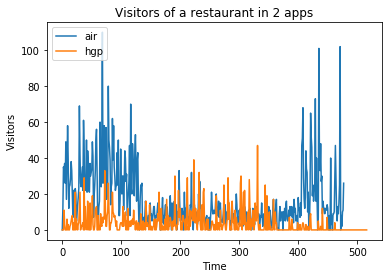

In [6]:
import matplotlib.pyplot as plt
plt.xlabel('Time')
plt.ylabel('Visitors')
plt.title('Visitors of a restaurant in 2 apps')
airV, = plt.plot(air_list)
hpgV, = plt.plot(hpg_list)
plt.legend([airV, hpgV], ['air', 'hgp'], loc='upper left')
plt.savefig('visitors2.png')
plt.show()

In [16]:
air_vis_list = air_vis_list[0:-1]